# Importing Libraries 

In [52]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

# Project 
## Titanic EDA Anlaysis 

In [53]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\titanic.csv")

# Data Info

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.shape

(891, 12)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Cleaning & Handling

In [58]:
df.drop(columns=["Ticket","Cabin"],inplace=True)

In [59]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [60]:
df["Age"]=df["Age"].fillna(df["Age"].mode()[0]).astype("int")
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df["Age"].value_counts()
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

# EDA & Visualization

## Gender Distribution & Survival By Passenger Class 

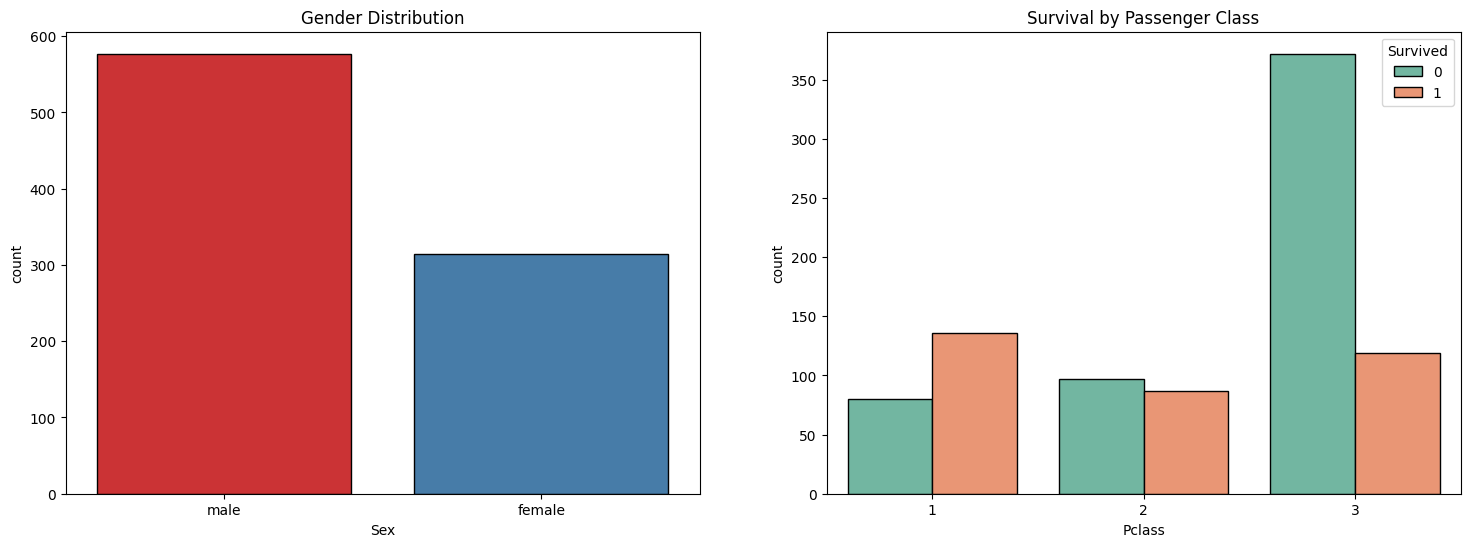

In [63]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(x='Sex', data=df,edgecolor="black",palette="Set1")
plt.title("Gender Distribution")
plt.subplot(1,2,2)
sns.countplot(x='Pclass', hue='Survived', data=df,edgecolor="black",palette="Set2")
plt.title("Survival by Passenger Class")
plt.show()


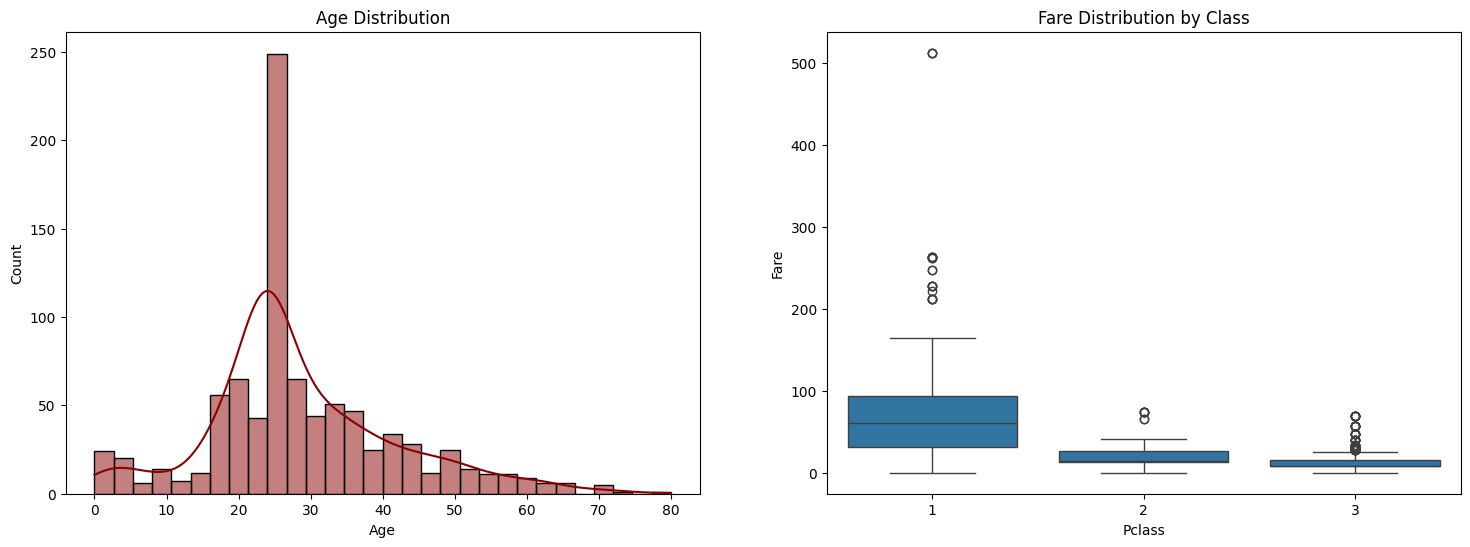

In [64]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, bins=30,color="darkred")
plt.title("Age Distribution")
plt.subplot(1,2,2)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Class")
plt.show()


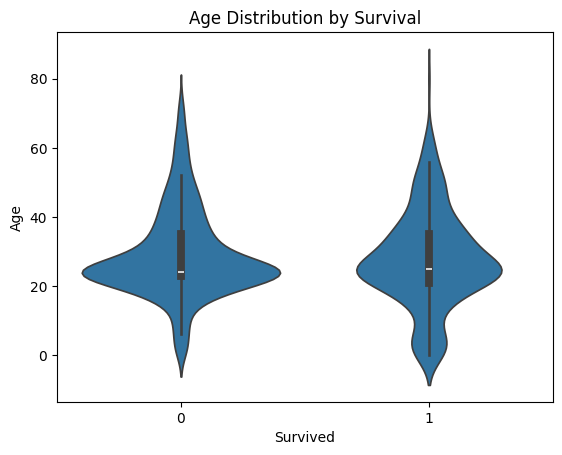

In [65]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


In [66]:
import plotly.express as px

fig = px.box(df, x='Survived', y='Fare', color='Survived',
             title='Fare Distribution by Survival')
fig.show()


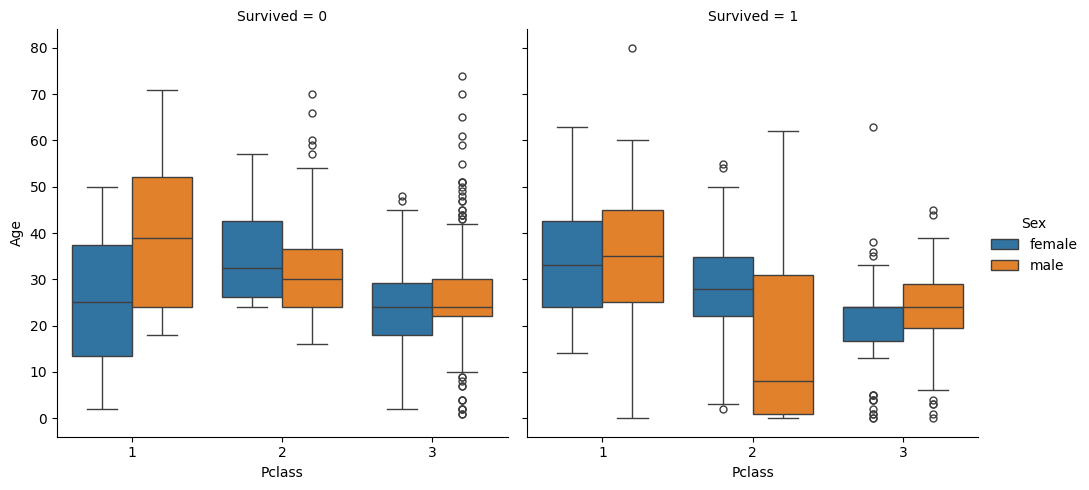

In [67]:
sns.catplot(x='Pclass', y='Age', hue='Sex', col='Survived',
            data=df, kind='box')


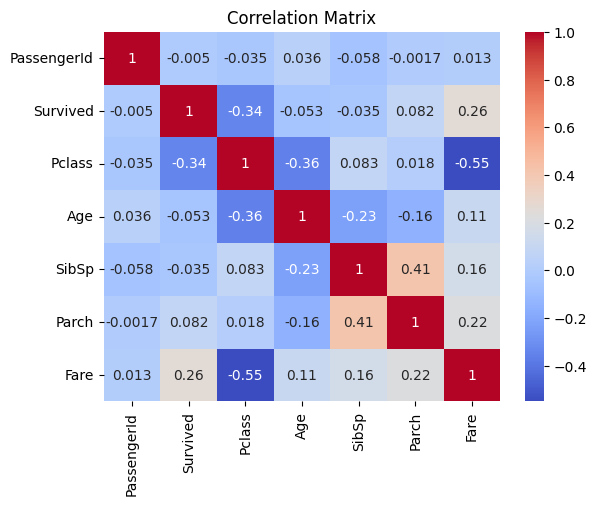

In [68]:
import numpy as np

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S


In [70]:
fig = px.sunburst(df,
                  path=['Pclass', 'Sex', 'Embarked'],
                  values='Fare',
                  title='Passenger Breakdown by Class, Gender, and Embarkation')
fig.show()


In [71]:
fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                 hover_data=['Name', 'Sex', 'Pclass'],
                 title='Fare vs Age with Survival Info')
fig.show()


<Axes: >

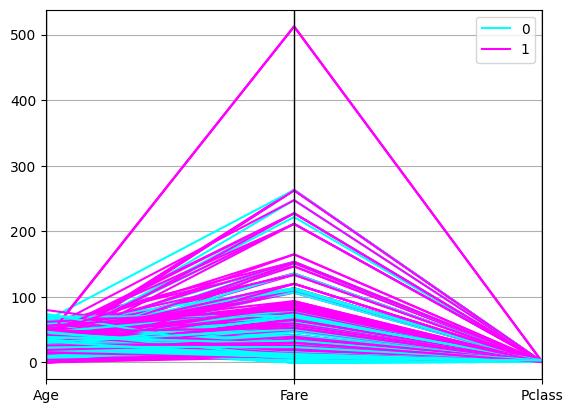

In [75]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df[['Survived', 'Age', 'Fare', 'Pclass']], 'Survived', colormap='cool')


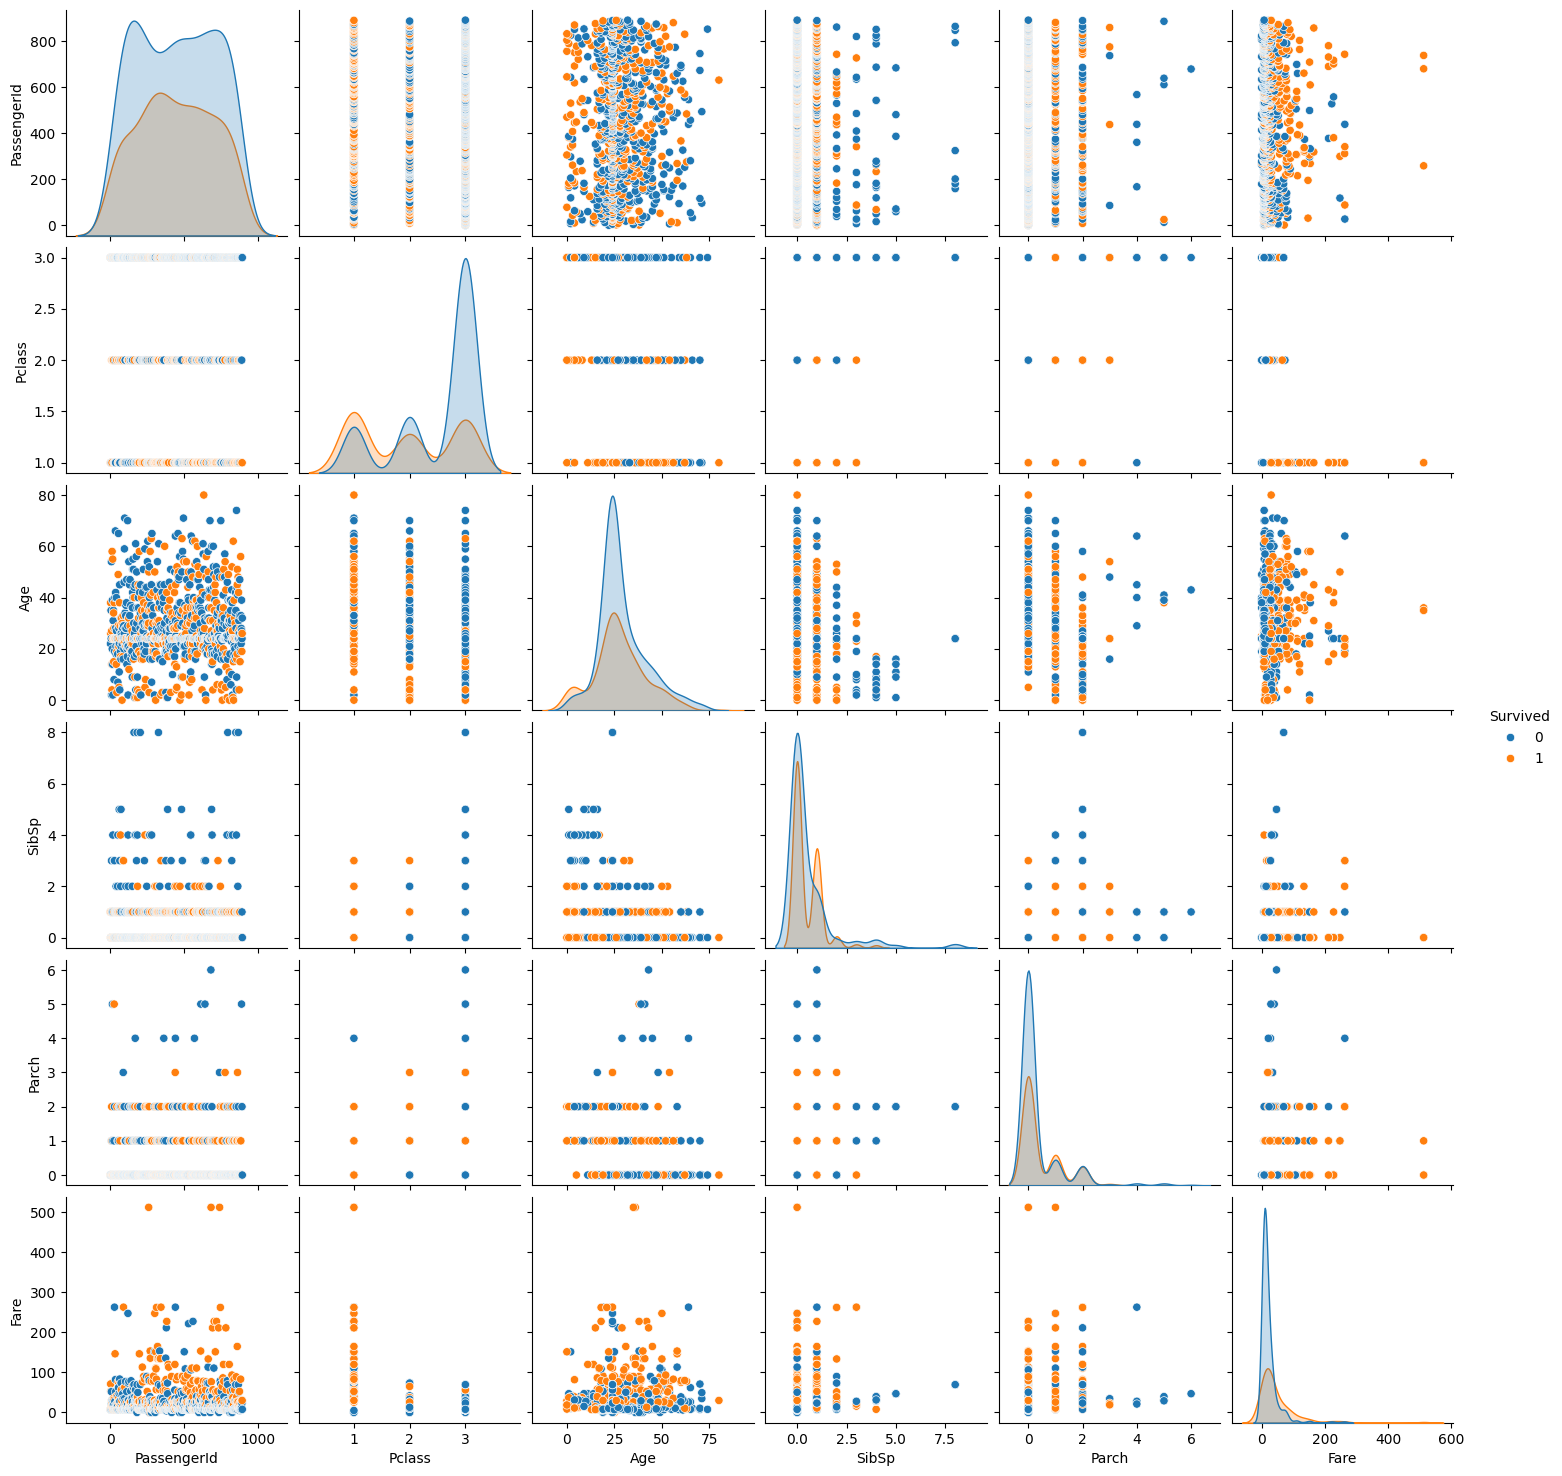

In [73]:
import seaborn as sns

sns.pairplot(df, hue='Survived', diag_kind='kde')
